In [174]:
import numpy as np 
import pandas as pd 
import os 
import h5py 
import csv 
import datetime as dt
import matplotlib.pyplot as plt
from sklearn import utils

In [11]:
file_loc = 'cleaned.hdf5'
def get_attrs(attribute):
    unique_psu = {}
    with h5py.File(file_loc,'r') as f:
        for dset in f.keys():
            d = f[dset]
            for b in d.keys():
                if attribute in d[b].attrs:
                    if d[b].attrs[attribute] not in unique_psu:
                        unique_psu[d[b].attrs[attribute]] = 1
                    else:
                        unique_psu[d[b].attrs[attribute]] = unique_psu[d[b].attrs[attribute]]+1
    return unique_psu
    

<h3><font color = #bf5700> Meta Analysis Total Dataset </font> </h3>

In [17]:
def plot_mdata(attribute):  
    data = get_attrs(attribute)
    uniques = data.keys()
    values = [data[at] for at in uniques]
    df = pd.DataFrame()
    df.loc[:,attribute] = uniques
    df.loc[:,'Count'] = values
    df.sort_values(by='Count',ascending=True,inplace=True)
    plt.barh(np.arange(len(uniques)), df.loc[:,'Count'], align='center', alpha=0.5)
    plt.yticks(np.arange(len(uniques)), df.loc[:,attribute])
    plt.xlabel('Count')
    plt.title('Overall {} Distribution'.format(attribute))
    plt.show()

<h4> Industry </h4>

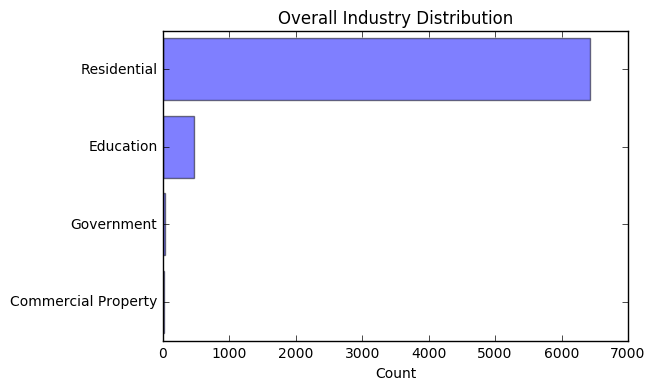

In [18]:
plot_mdata('Industry')

<h4> SubIndustry </h4>

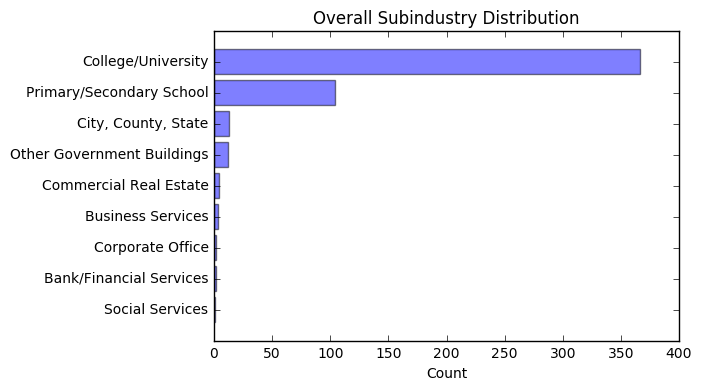

In [19]:
plot_mdata('Subindustry')

<h4> Primary Space Usage </h4>

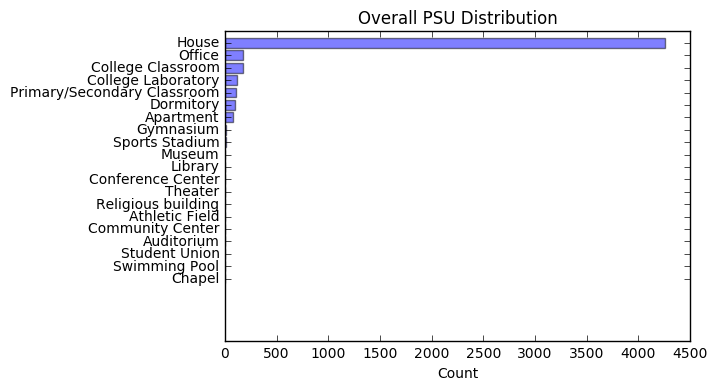

In [20]:
plot_mdata('PSU')

<h4>Timezone</h4>

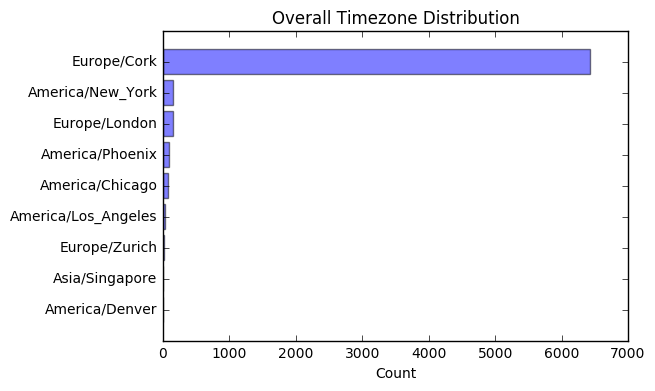

In [21]:
plot_mdata('Timezone')

In [30]:
with h5py.File(file_loc,'r') as f: 
    sqfts = {}
    for d in f.keys():
        sqfts[d] = []
        dset = f[d]
        i = 0
        for b in dset.keys():
            building= dset[b]
            if 'Sqft' in building.attrs:
                sqfts[d].append(building.attrs['Sqft'])
            

In [164]:
df = pd.DataFrame()
for buil in sqfts.keys():
    new_df = pd.DataFrame()
    data = sqfts[buil]
    if(len(data)!=0):
        keys = [buil]*len(data)
        new_df.loc[:,'Dset'] = keys
        new_df.loc[:,'Sqft'] = [float(d) for d in data]
        df = df.append(new_df,ignore_index=True)
        

In [ ]:
def is_int(i):
    try: 
        int(i)
        return True
    except:
        return False
def to_mit(i):
    if is_int(str(i)[0]):
        return 'M'+str(i)
    else:
        return i
def mit_trim(num):
    i=1
    if(not is_int(num[i])):
        i = 2
    while(is_int(num[i])):
        i = i+1
    return num[:i]
        
with open ('MIT_SQFT.txt') as f: 
    for ln in f: 
        dat = ln.split(' ')
        keys = []
        dset = {}
        for i in range(len(dat)):
            if i<=8:
                keys.append(dat[i])
                dset[dat[i]] = []
            elif '--' in dat[i]:
                continue
            else:
                if(keys[i%9]=='BLDG'):
                    dset[keys[i%9]].append(to_mit(dat[i]))
                else:
                    dset[keys[i%9]].append(dat[i])
            

In [ ]:
sqft_df = pd.DataFrame()
for key in keys:
    sqft_df.loc[:,key] = dset[key]
lis = sqft_df.loc[:,'GROSS'].tolist()
temp = ['MIT']*len(lis)
new_df = pd.DataFrame()
new_df.loc[:,'Dset'] = temp
new_df.loc[:,'Sqft'] = lis

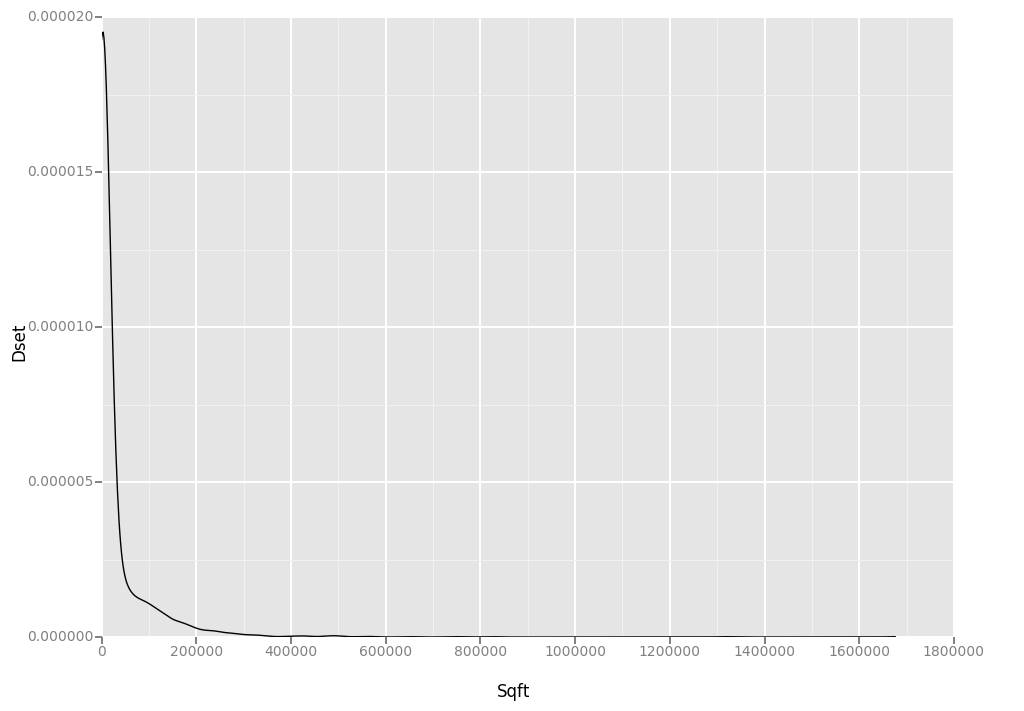

<ggplot: (159651556465)>

In [106]:
ggplot(aes(x='Sqft',y='Dset'),data=df)+geom_density()

In [171]:
df = df.append(new_df,ignore_index=True)

In [173]:
df.to_csv('sqfts.csv')

In [141]:
with h5py.File('cleaned.hdf5') as f: 
    ds = f['MIT']
    ind = 0
    outd = 0
    for buil in ds.keys():
        if(buil in df['BLDG'].tolist()):
            print('{} has a registered SQFT'.format(buil))
            ind = ind +1
        else:
            print('{} is not in DF'.format(buil))
            outd = outd +1

E15A is not in DF
E15B is not in DF
E18A is not in DF
E18B is not in DF
E18C is not in DF
E19A is not in DF
E19B is not in DF
E1A is not in DF
E23A is not in DF
E23B is not in DF
E2A is not in DF
E38A is not in DF
E40A is not in DF
E40B is not in DF
E40C is not in DF
E40D is not in DF
E52A is not in DF
E62A is not in DF
E62B is not in DF
M13A is not in DF
M13B is not in DF
M13C is not in DF
M13D is not in DF
M13E is not in DF
M18A is not in DF
M18B is not in DF
M24A is not in DF
M26A is not in DF
M26B is not in DF
M26C is not in DF
M26D is not in DF
M2A is not in DF
M32D_A is not in DF
M32D_B is not in DF
M32G_A is not in DF
M32G_B is not in DF
M33A is not in DF
M35A is not in DF
M36A is not in DF
M36B is not in DF
M36C is not in DF
M36D is not in DF
M36E is not in DF
M37A is not in DF
M37B is not in DF
M46A is not in DF
M46B is not in DF
M46C is not in DF
M46D is not in DF
M50A is not in DF
M50B is not in DF
M54A is not in DF
M54B is not in DF
M54C is not in DF
M56A is not in DF
M56B 